In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [13]:
data_raw = pd.read_csv(r"C:\Users\shrad\Downloads\Company_Data (1).csv")
data_raw

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [14]:
data_raw.describe(include = 'all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


<AxesSubplot:xlabel='Sales'>

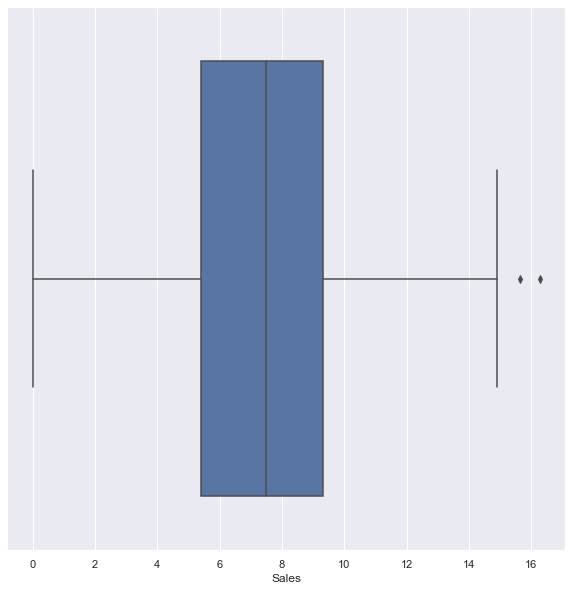

In [15]:
plt.figure(figsize = (10,10))
sns.boxplot(data_raw['Sales'], orient = '')

In [16]:
np.percentile(data_raw['Sales'] , 25)

5.390000000000001

In [17]:
data = data_raw.copy()

In [18]:
x = 0
for i in data_raw['Sales']:
    if i < np.percentile(data_raw['Sales'] , 33):
        data['Sales'][x] = 'Low'
    elif np.percentile(data_raw['Sales'] , 33) <= i <  np.percentile(data_raw['Sales'] , 90):
        data['Sales'][x] = 'Average'
    else:
        data['Sales'][x] = 'High'
    x += 1

In [19]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Average,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Average,111,48,16,260,83,Good,65,10,Yes,Yes
2,Average,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Average,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Average,139,23,3,37,120,Medium,55,11,No,Yes
397,Average,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [20]:
inputs = data.drop('Sales', axis = 1)

In [21]:
y = data['Sales']
X= pd.get_dummies(inputs, drop_first = True)
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state = 42)

In [22]:
#kfold = KFold(10)
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
#for train_index, test_index in kfold.split(X):
#    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [23]:
predictions = tree.predict(X_test)
np.mean(predictions == y_test)

0.64

In [24]:
pred_df = pd.DataFrame()
pred_df['Actual'] = y_test
pred_df['Predicted'] = predictions
pred_df

,Actual,Predicted
209,Low,Average
280,Low,Low
33,Average,Average
210,Low,Low
93,Average,Average
...,...,...
314,Average,High
373,Low,Average
380,Average,Average
239,Low,Low


In [25]:
from sklearn.metrics import confusion_matrix
cf_mat = confusion_matrix(y_test, predictions)
cf_mat

array([[37,  5, 13],
       [ 9,  5,  0],
       [ 9,  0, 22]], dtype=int64)

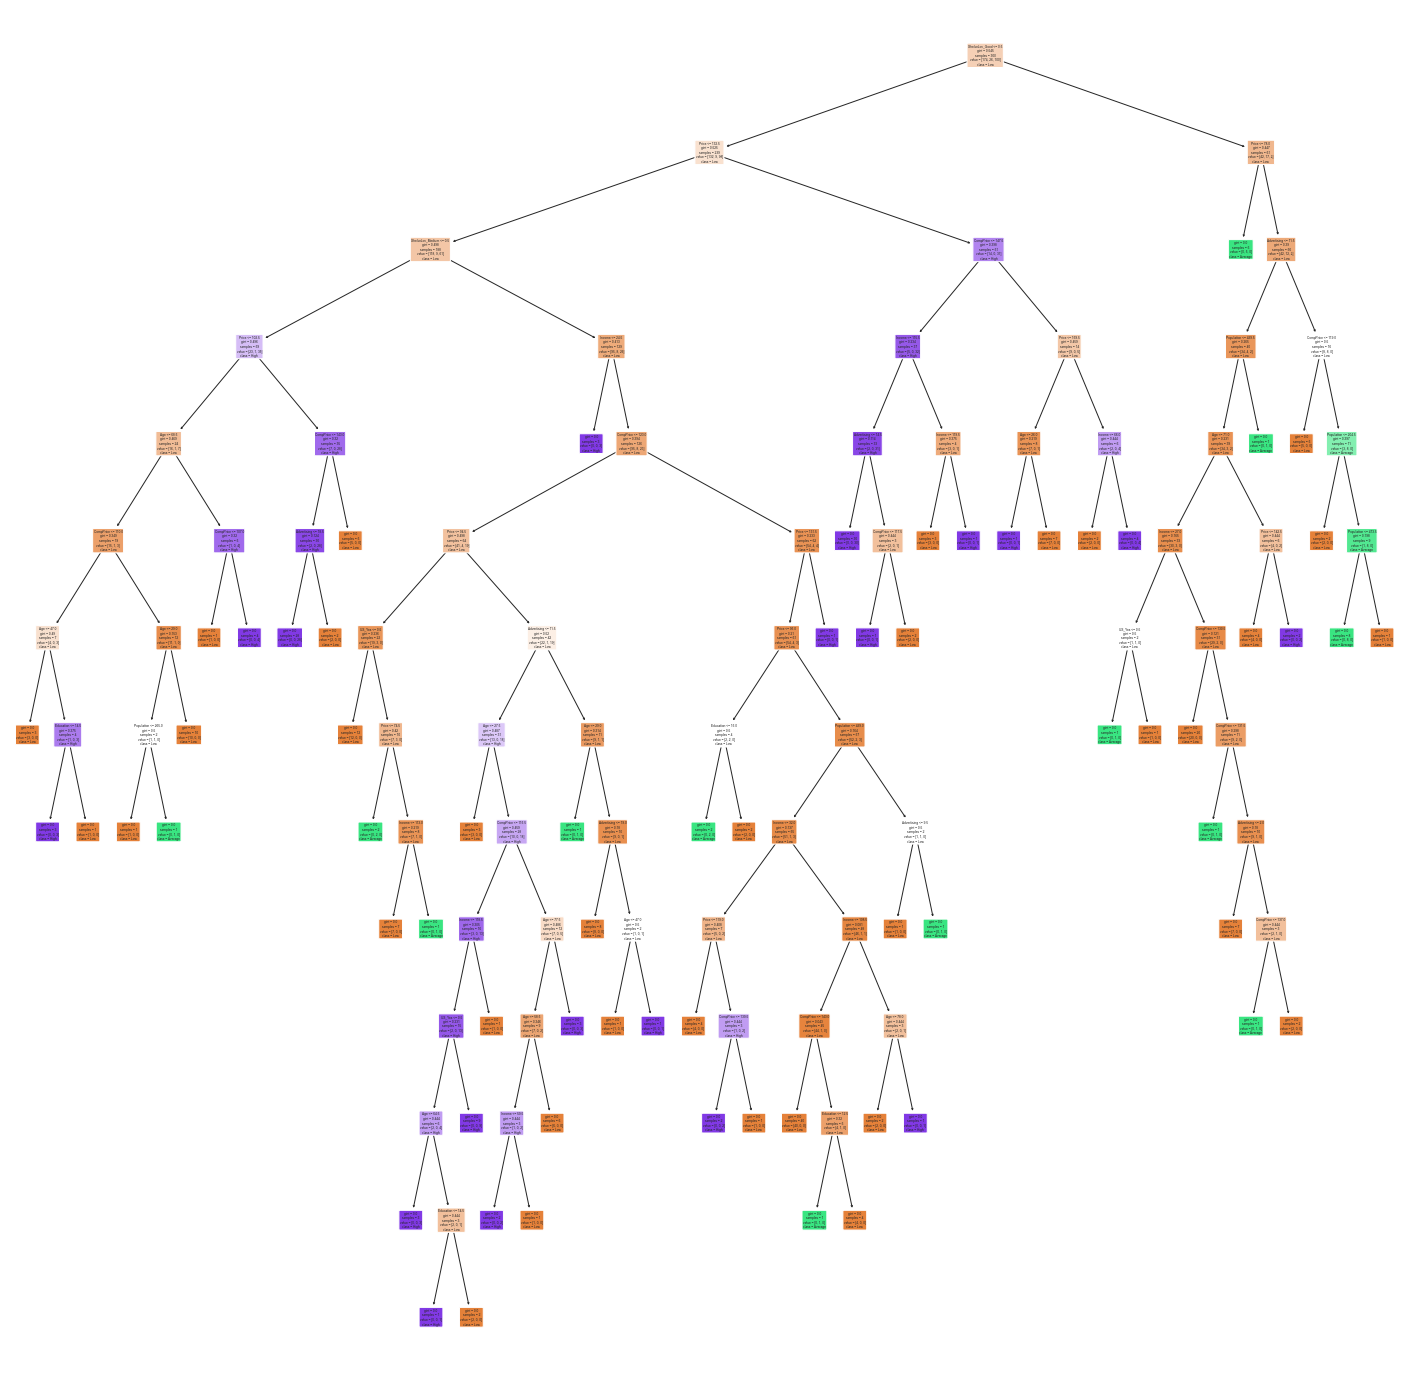

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize = (25,25))
plot_tree(tree, filled = True, rounded = True, feature_names = X.columns, class_names = ['Low', 'Average', 'High'])
plt.show()

# Cost Complexity Pruning

In [27]:
pruning = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = pruning.ccp_alphas[:-1]
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42 , ccp_alpha = ccp_alpha, criterion ='gini')
    tree.fit(X_train, y_train)
    trees.append(tree)
ccp_alphas

array([0.        , 0.003     , 0.003     , 0.00304545, 0.00305556,
       0.00322917, 0.00333333, 0.00371528, 0.00385185, 0.00444444,
       0.00444444, 0.00469444, 0.005     , 0.005     , 0.00533333,
       0.00549708, 0.00551515, 0.00568698, 0.00571717, 0.00575758,
       0.00583333, 0.00592593, 0.00592593, 0.00779762, 0.00790074,
       0.00808081, 0.00861953, 0.0100614 , 0.01101941, 0.01130358,
       0.01148918, 0.01244444, 0.01312417, 0.01745502, 0.01807182,
       0.02378484])

In [28]:
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

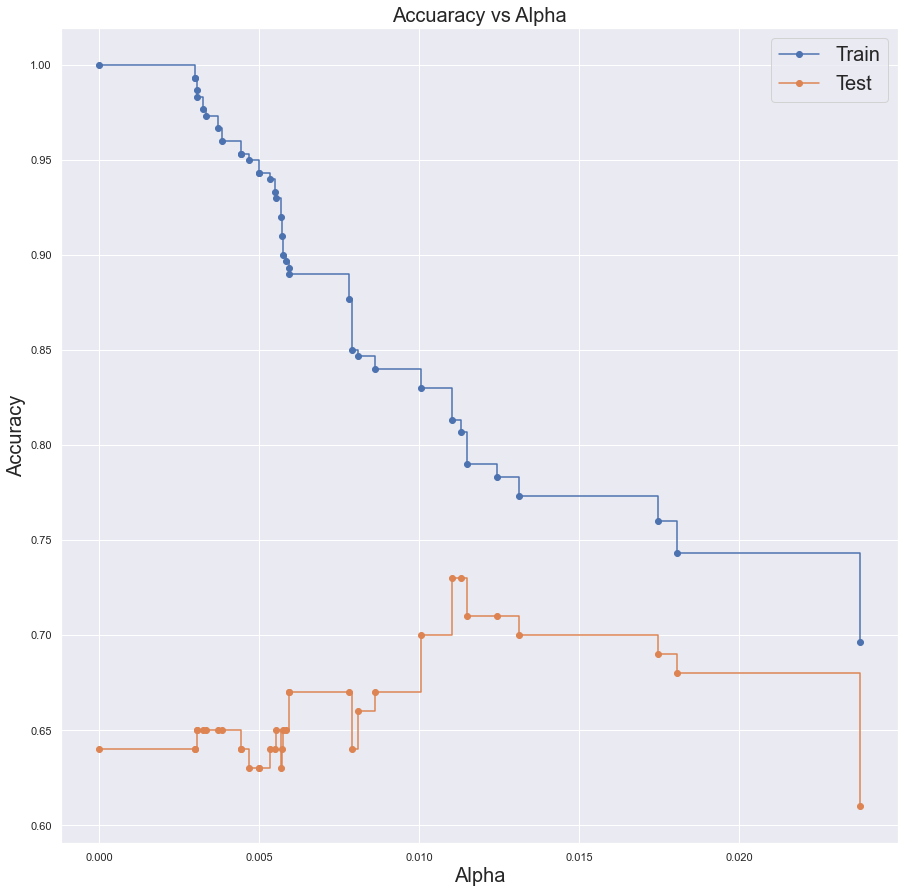

In [29]:
fig, ax = plt.subplots(figsize = (15,15))
ax.set_xlabel('Alpha', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
ax.set_title('Accuaracy vs Alpha', fontsize = 20)
ax.plot(ccp_alphas, train_scores, drawstyle = 'steps-post', marker = 'o', label = 'Train' )
ax.plot(ccp_alphas, test_scores, drawstyle = 'steps-post', marker = 'o', label = 'Test')
ax.legend(fontsize = 20)
plt.show()

# Determining the best alpha

In [30]:
kfold = KFold(10)
alpha_values = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42, criterion = 'gini', ccp_alpha =  ccp_alpha)
    scores = cross_val_score(tree, X_train, y_train, cv = kfold)
    alpha_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
alpha_results = pd.DataFrame(alpha_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.663333,0.083600
1,0.003000,0.666667,0.082999
2,0.003000,0.666667,0.082999
3,0.003045,0.666667,0.082999
4,0.003056,0.666667,0.082999
5,0.003229,0.666667,0.082999
6,0.003333,0.670000,0.083600
7,0.003715,0.663333,0.079512
8,0.003852,0.663333,0.079512
9,0.004444,0.653333,0.073333


<AxesSubplot:xlabel='alpha'>

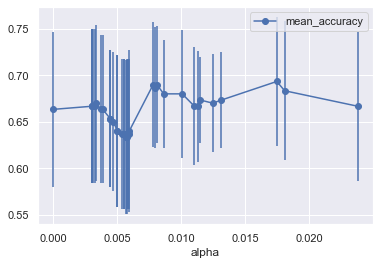

In [31]:
alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o')

In [32]:
accuracy_max = max(alpha_results['mean_accuracy'])
alpha_ideal = alpha_results[alpha_results['mean_accuracy'] == accuracy_max]
alpha_ideal = float(alpha_ideal['alpha'])
alpha_ideal

0.01745501804325334

# Pruned Decision Tree

In [33]:
tree_pruned = DecisionTreeClassifier(random_state = 42, criterion = 'gini', ccp_alpha = alpha_ideal)
tree_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01745501804325334, random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [34]:
predictions = tree_pruned.predict(X_test)
pred_df = pd.DataFrame()
pred_df['Actual'] = y_test
pred_df['Predicted'] = predictions
np.mean(predictions == y_test)

0.69

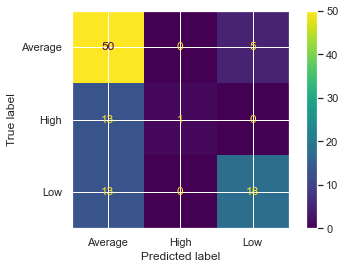

In [35]:
plot_confusion_matrix(tree_pruned, X_test, y_test)

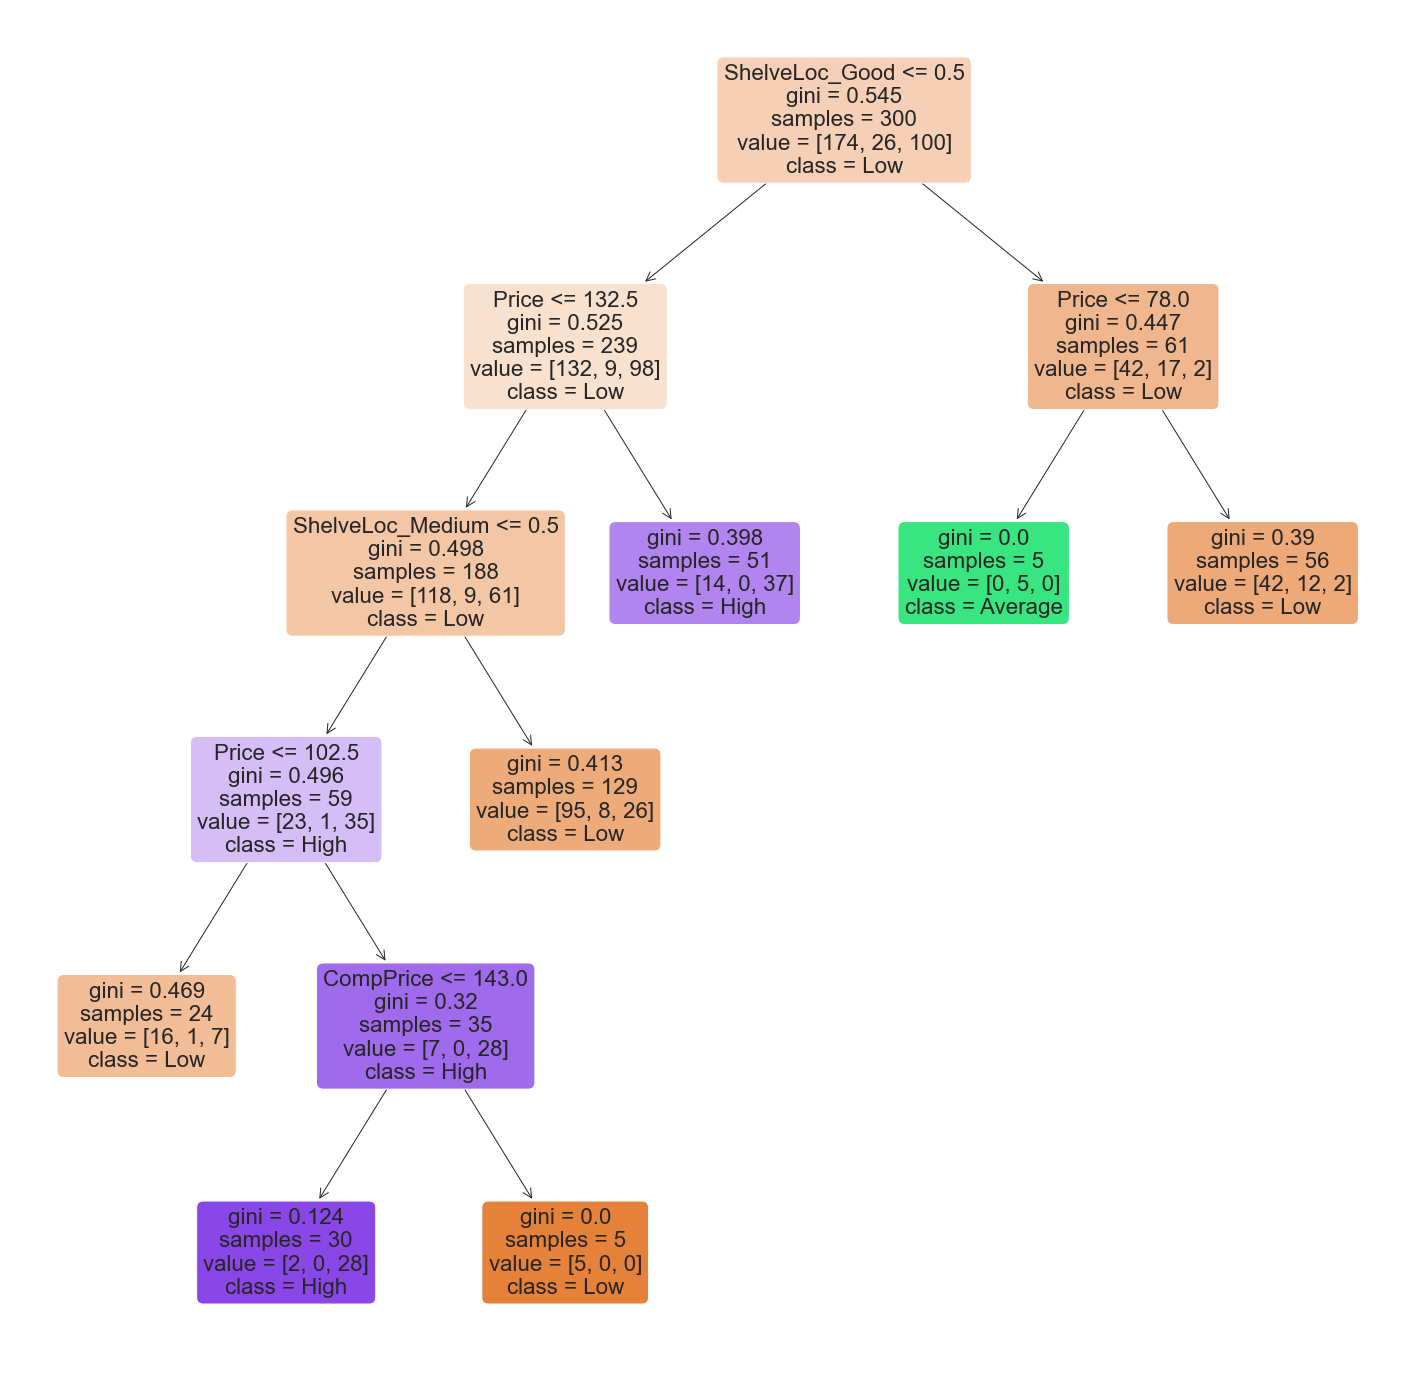

In [36]:
plt.figure(figsize = (25,25))
plot_tree(tree_pruned, filled = True, rounded = True, feature_names = X.columns, class_names = ['Low', 'Average', 'High'])
plt.show()